<a href="https://colab.research.google.com/github/AhmedB479/Pest-Prediction/blob/main/data_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('cotton_summary_compilation.xlsx')
# Standardization mapping (alias: canonical form)

normalization_map = {
    'BURE WALA': 'BUREWALA',
    'DUYAPUR': 'DUNYA PUR',
    'BAHAWAL PUR': 'BAHAWALPUR',
    'BAHAWAL NAGAR': 'BAHAWALNAGAR',
    'MINCHAN ABAD': 'MINCHINABAD',
    'R.Y.KHAN': 'RAHIM YAR KHAN',
    'SADIQ ABAD': 'SADIQABAD',
    'D.G.KHAN': 'D.G. KHAN',
    'MUZUFAR GARH': 'MUZAFFARGARH',
    'KAROR L.E.': 'KAROR LAL ESAN',
    'RAJAN PUR': 'RAJANPUR',
    'JAM PUR': 'JAMPUR',
    'A.P SIAL': 'A.P. SIAL',
    'T.T.SINGH': 'T.T. SINGH',
    'MIANCHANNU': 'MIAN CHANNU',
    'SILLANWALI/ SAHIWAL': 'SILLANWALI',
    'CHAK JUMRAH': 'CHAK JHUMRA',
    'QASUR': 'KASUR',
    'kASUR': 'KASUR',
    'KOTMOMIN': 'KOT MOMIN',
    'SILANWALI': 'SILLANWALI',
    'QUIDABAD': 'QUAIDABAD',
    'Bhowana': 'BHOWANA',
    'BHOANA': 'BHOWANA',
    # 'BUREWALA' :,
    # 'BAHAWALPUR':,
    # 'BAHAWALNAGAR':
    # 'MINCHINABAD':
    # 'DUNYA PUR' :,
    # 'MINCHINABAD' :,
    # 'RAHIM YAR KHAN':,
    # 'SADIQABAD':,
    # 'D.G. KHAN':,
    # 'MUZAFFARGARH':,
    # 'KAROR LAL ESAN':,
    # 'RAJANPUR':,
    # 'JAMPUR':,
    # 'A.P. SIAL':,
    # 'T.T. SINGH':,
    # 'MIAN CHANNU':,
    # 'SILLANWALI':,
    # 'CHAK JHUMRA':,
    # 'KASUR':,
    # 'KOT MOMIN':,
    # 'QUAIDABAD':,
    # 'BHOWANA':,
    # 'FAISALABAD':,
    # 'HAROON ABAD':,
    # 'SAMUNDRI':,
    'FAISALABAD+CHAK CHUMRA': 'FAISALABAD',
    'FAISALABAD+CHAK JHUMRA': 'FAISALABAD',
    'FAISALABAD+CHAK CHUM': 'FAISALABAD',
    'FAISAL ABAD': 'FAISALABAD',
    'A.P.SIAL': 'A.P. SIAL',
    'SUMUNDRI (fAISALABAD)': 'SAMUNDRI',
    'SUMUNDRI, TANDLIANWALA': 'SAMUNDRI',
    'HAROON ABAD (BAHAWAL NAGAR)': 'HAROON ABAD',
    '18-HAZARI (JHANG)': '18-HAZARI'
}

df['TEHSILS'] = df['TEHSILS'].apply(
    lambda x: normalization_map.get(x.strip(), x.strip().lower())
)
df[['week', 'drop', 'month', 'year']] = df['TIMEFRAME'].str.split(' ', n=3, expand=True)
df.drop(columns=['drop'], inplace=True)

# Step 2: Convert month to number
df['month'] = pd.to_datetime(df['month'], format='%B').dt.month

# Step 3: Convert week and year to integers
df['week'] = df['week'].astype(int)
df['year'] = df['year'].astype(int)

# Step 4: Reorder columns (week, month, year first)
cols = ['week', 'month', 'year'] + [col for col in df.columns if col not in ['week', 'month', 'year']]
df = df[cols]
df =df.drop(columns=['TIMEFRAME'])
text_columns = df.select_dtypes(include=['object']).columns

for col in text_columns:
    df[col] = df[col].str.lower()

columns_to_encode = ['TEHSILS']  # Add other categorical columns as needed

# df_encoded = pd.get_dummies(
#     df,
#     columns=columns_to_encode,
#     prefix=columns_to_encode,
#     prefix_sep='_'
# )
# df_encoded
df

,week,month,year,TEHSILS,TOTAL SPOTS VISITED,TOTAL AREA VISITED,W. FLY(ABOVE ETL),JASSID(ABOVE ETL),THRIPS(ABOVE ETL),M.BUG(ABOVE ETL),...,PBW(ABOVE ETL),ABW(ABOVE ETL),Army Worm(ABOVE ETL),SBW(BELOW ETL),PBW(BELOW ETL),ABW(BELOW ETL),CLCV(%SPOT),CLCV(%AREA),WILT(%SPOT),WILT(%AREA)
0,1,5,2022,multan,15,42.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,2022,shujabad,15,62.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.7,0.0,6.7,0.0,0.0,0.0,0.0,0.0
2,1,5,2022,jalal pur p.w,9,36.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,5,2022,khanewal,14,128.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,5,2022,jahanian,15,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,1,7,2020,isa khel,15,48.0,0.0,6.7,6.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9716,1,7,2020,bhakkar,6,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9717,1,7,2020,mankera,7,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.3,0.0,0.0,0.0,0.0,0.0
9718,1,7,2020,kallor kot,13,34.0,0.0,15.4,0.0,0.0,...,0.0,0.0,0.0,0.0,7.7,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dictionary mapping tehsil names to their coordinates
tehsil_coords = {
    'multan': (30.1575, 71.5249),
    'shujabad': (29.8801, 71.2939),
    'jalal pur p.w': (29.6346, 71.2184),
    'khanewal': (30.3018, 71.9321),
    'jahanian': (30.2752, 71.8044),
    'kabir wala': (30.4068, 71.8667),
    'mian channu': (30.4397, 72.3543),
    'vehari': (30.0459, 72.3489),
    'mailsi': (29.8015, 72.1758),
    'burewala': (30.1667, 72.6500),
    'lodhran': (29.5403, 71.6336),
    'dunya pur': (29.8000, 71.7500),
    'kehror pacca': (29.6000, 71.0000),
    'sahiwal': (30.6700, 73.1067),
    'chicha watni': (30.5333, 72.7000),
    'pak pattan': (30.3410, 73.3866),
    'arif wala': (30.3000, 73.0667),
    'okara': (30.8100, 73.4500),
    'renala khurd': (30.8833, 73.6000),
    'depalpur': (30.6667, 73.6500),
    'bahawalpur': (29.3956, 71.6836),
    'a.p.east': (29.0000, 71.0000),
    'yazman': (29.1211, 71.7446),
    'hasilpur': (29.6967, 72.5542),
    'bahawalnagar': (29.9983, 73.2536),
    'haroon abad': (29.6100, 73.1383),
    'fort abbas': (29.1833, 72.8500),
    'minchinabad': (30.1633, 73.5683),
    'chishtian': (29.8000, 72.8667),
    'rahim yar khan': (28.4202, 70.2952),
    'khan pur': (28.6453, 70.6567),
    'liaquat pur': (28.9270, 70.9560),
    'sadiqabad': (28.3062, 70.1302),
    'd.g. khan': (30.0500, 70.6333),
    'taunsa': (30.7000, 70.6500),
    'kot chutta': (30.4000, 70.7500),
    'muzaffargarh': (30.0703, 71.1933),
    'kot addu': (30.4700, 70.9644),
    'ali pur': (29.3840, 70.9110),
    'jatoi': (29.5167, 70.8500),
    'layyah': (30.9646, 70.9444),
    'chobara': (31.2167, 70.7500),
    'karor lal esan': (31.2167, 70.9500),
    'rajanpur': (29.1044, 70.3297),
    'jampur': (29.6383, 70.5956),
    'rojhan': (28.7000, 69.9500),
    'jhang': (31.2690, 72.3186),
    '18-hazari': (31.7500, 72.1833),
    'a.p. sial': (31.0000, 72.0000),
    'shorkot': (30.5000, 72.0000),
    't.t. singh': (30.9667, 72.4833),
    'gojra': (31.1500, 72.6833),
    'pir mahal': (30.7667, 72.4333),
    'sumundri': (31.0333, 72.9667),
    'tandlianwala': (30.9500, 72.6833),
    'mianwali': (32.5833, 71.5333),
    'piplan': (32.2833, 71.3667),
    'isa khel': (32.6833, 71.2667),
    'bhakkar': (31.6333, 71.0667),
    'mankera': (31.3833, 71.4500),
    'kallor kot': (31.6167, 71.2667),
    'darya khan': (31.7833, 71.1000),
    'faisalabad': (31.4187, 73.0791),
    'jaranwala': (31.3333, 73.4333),
    'sargodha': (32.0836, 72.6711),
    'sillanwali': (31.8167, 72.5333),
    'chak jhumra': (31.5667, 73.1000),
    'kot momin': (32.1833, 72.6500),
    'quaidabad': (32.4833, 71.8000),
    'kasur': (31.1167, 74.4500),
    'patoki': (31.0167, 73.8500),
    'chunian': (30.9667, 73.9833),
    'kot radha kishan': (31.1667, 74.1000),
    'bhowana': (31.5667, 72.6500),
    'bhalwal': (32.2667, 72.9000),
    'shahpur': (32.2667, 72.4000),
    'khushab': (32.3000, 72.3500),
    'bhera': (32.4833, 72.9167),
    'peer mehal': (30.7667, 72.4333),
    'kamalia': (30.7333, 72.6500),
    'samundri': (31.0300, 72.9613)
}
# Create new columns for latitude and longitude
df['latitude'] = df['TEHSILS'].map(lambda x: tehsil_coords.get(x, (None, None))[0])
df['longitude'] = df['TEHSILS'].map(lambda x: tehsil_coords.get(x, (None, None))[1])
df = df.drop(columns='TEHSILS')
df

,week,month,year,TOTAL SPOTS VISITED,TOTAL AREA VISITED,W. FLY(ABOVE ETL),JASSID(ABOVE ETL),THRIPS(ABOVE ETL),M.BUG(ABOVE ETL),MITES(ABOVE ETL),...,Army Worm(ABOVE ETL),SBW(BELOW ETL),PBW(BELOW ETL),ABW(BELOW ETL),CLCV(%SPOT),CLCV(%AREA),WILT(%SPOT),WILT(%AREA),latitude,longitude
0,1,5,2022,15,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.1575,71.5249
1,1,5,2022,15,62.0,0.0,0.0,0.0,0.0,0.0,...,6.7,0.0,6.7,0.0,0.0,0.0,0.0,0.0,29.8801,71.2939
2,1,5,2022,9,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.6346,71.2184
3,1,5,2022,14,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.3018,71.9321
4,1,5,2022,15,74.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.2752,71.8044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,1,7,2020,15,48.0,0.0,6.7,6.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.6833,71.2667
9716,1,7,2020,6,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.6333,71.0667
9717,1,7,2020,7,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.3,0.0,0.0,0.0,0.0,0.0,31.3833,71.4500
9718,1,7,2020,13,34.0,0.0,15.4,0.0,0.0,0.0,...,0.0,0.0,7.7,0.0,0.0,0.0,0.0,0.0,31.6167,71.2667


In [ ]:
df.columns

Index(['week', 'month', 'year', 'TOTAL SPOTS VISITED', 'TOTAL AREA VISITED',
       'W. FLY(ABOVE ETL)', 'JASSID(ABOVE ETL)', 'THRIPS(ABOVE ETL)',
       'M.BUG(ABOVE ETL)', 'MITES(ABOVE ETL)', 'APHIDS(ABOVE ETL)',
       'DUSKY COTTON BUG(ABOVE ETL)', 'W. FLY(BELOW ETL)', 'JASSID(BELOW ETL)',
       'THRIPS(BELOW ETL)', 'MITES(BELOW ETL)', 'APHIDS(BELOW ETL)',
       'DUSKY COTTON BUG(BELOW ETL)', 'SBW(ABOVE ETL)', 'PBW(ABOVE ETL)',
       'ABW(ABOVE ETL)', 'Army Worm(ABOVE ETL)', 'SBW(BELOW ETL)',
       'PBW(BELOW ETL)', 'ABW(BELOW ETL)', 'CLCV(%SPOT)', 'CLCV(%AREA)',
       'WILT(%SPOT)', 'WILT(%AREA)', 'latitude', 'longitude',
       'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
       'dew_point_2m_mean'],
      dtype='object')

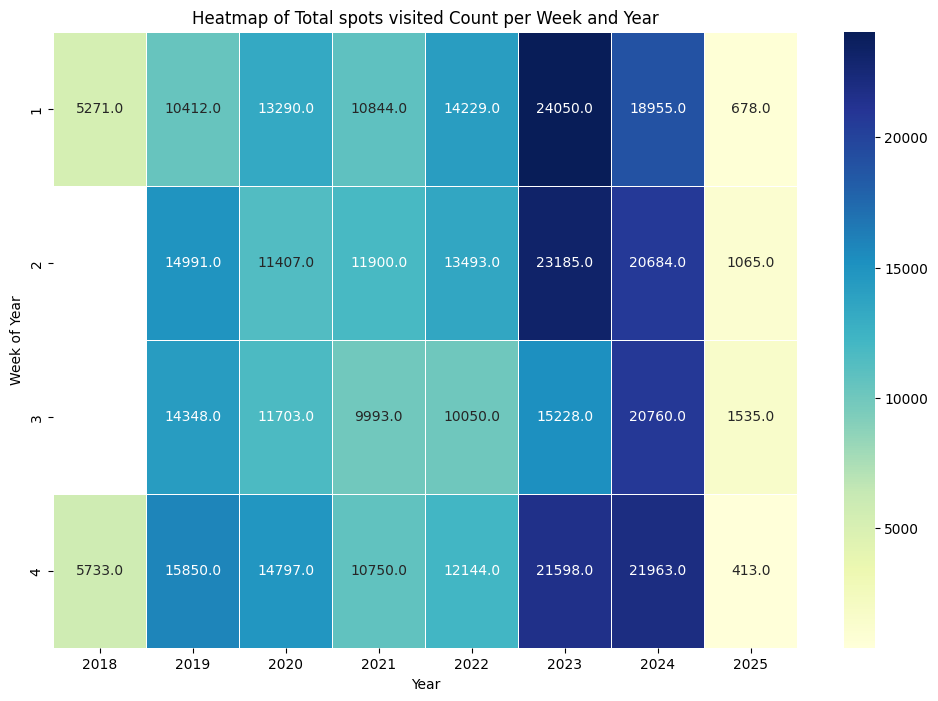

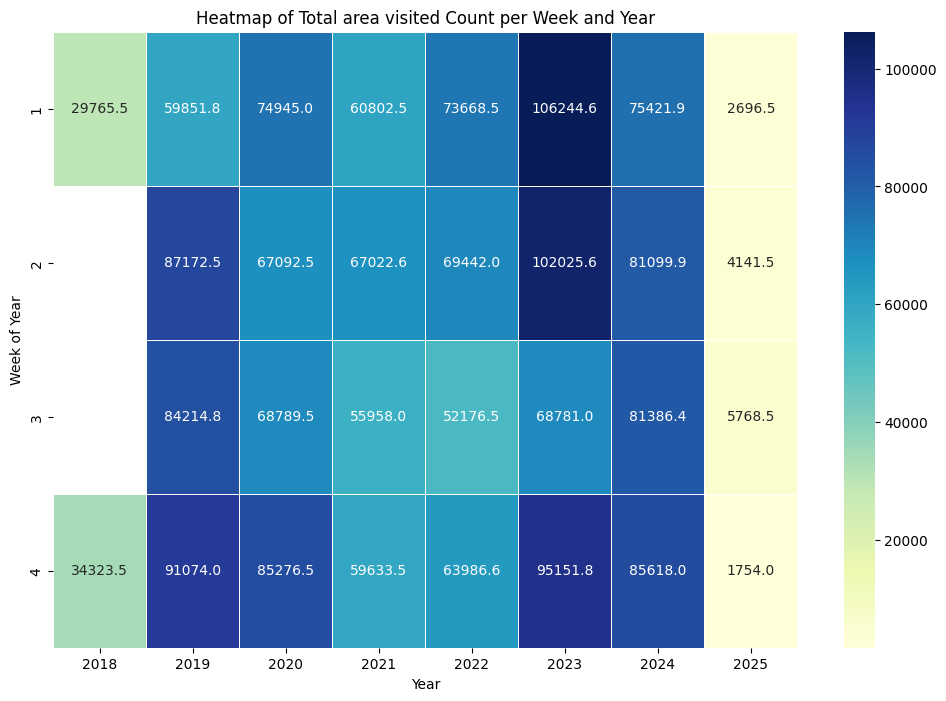

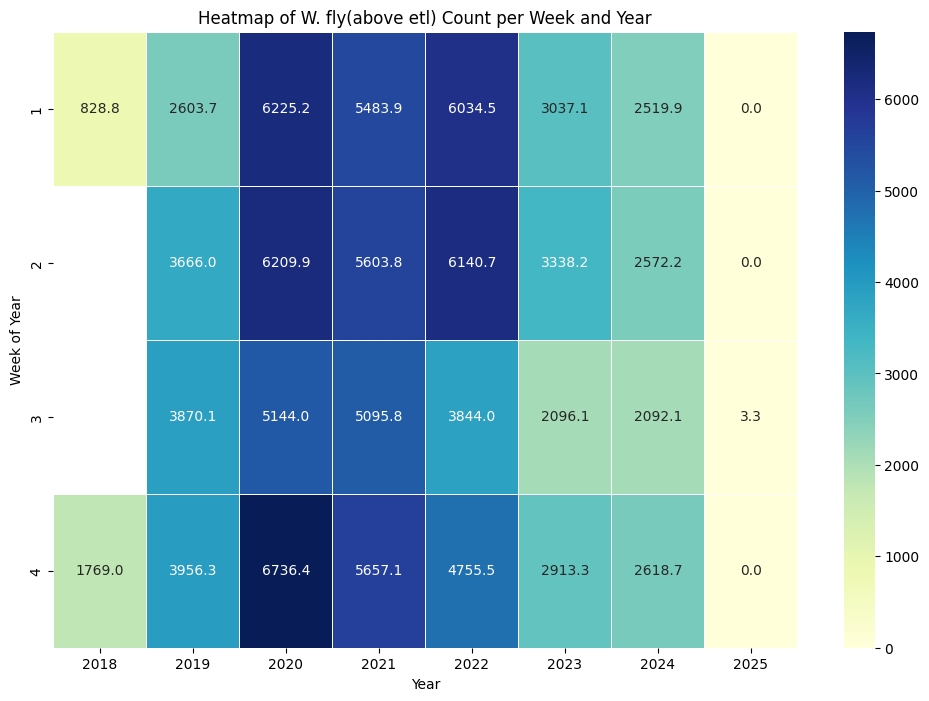

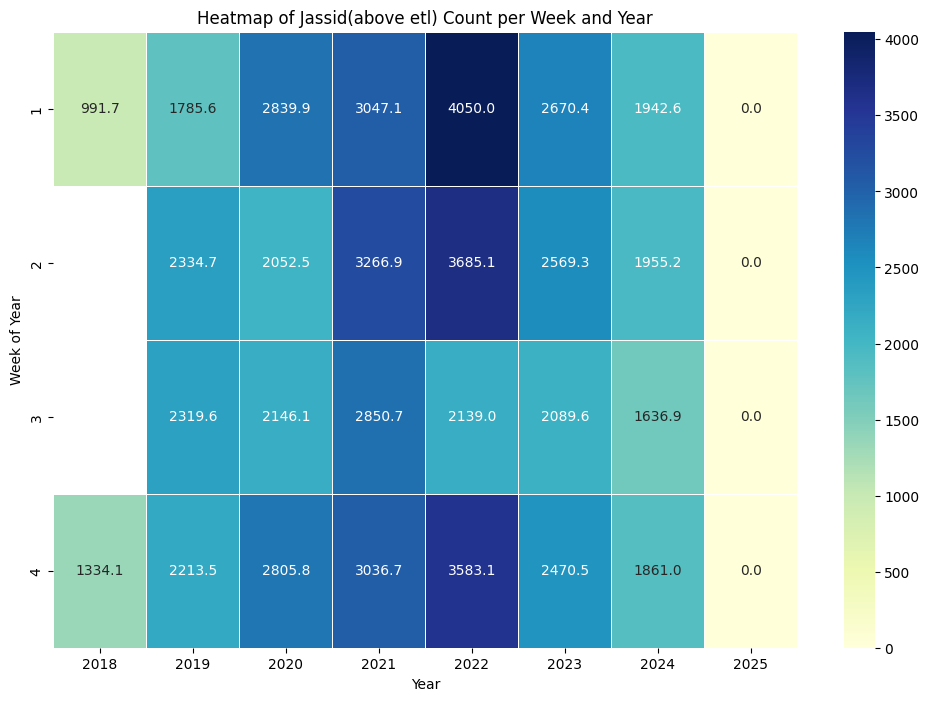

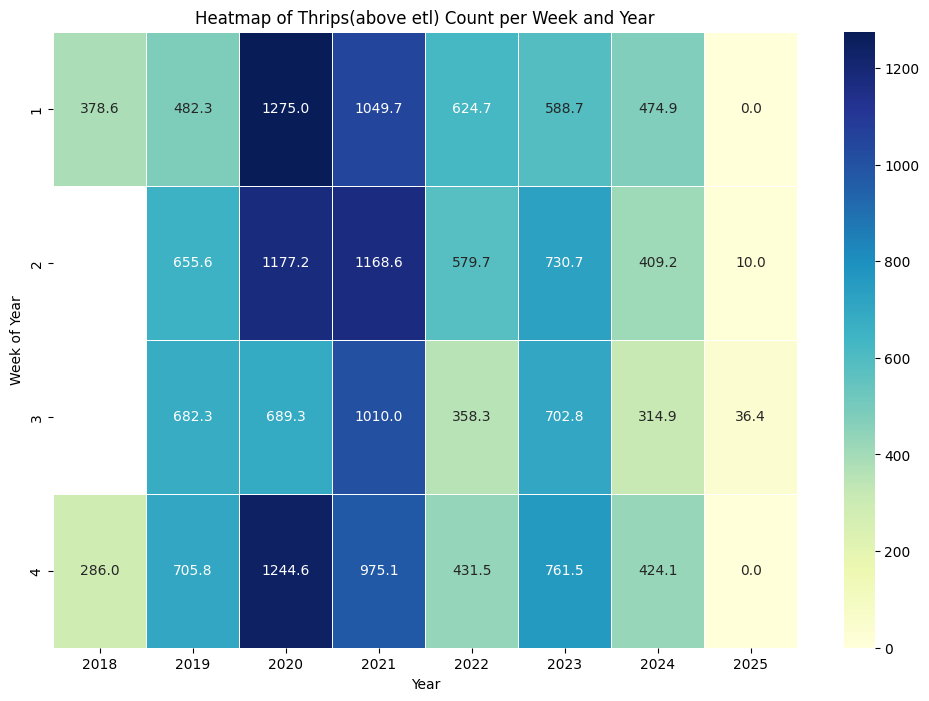

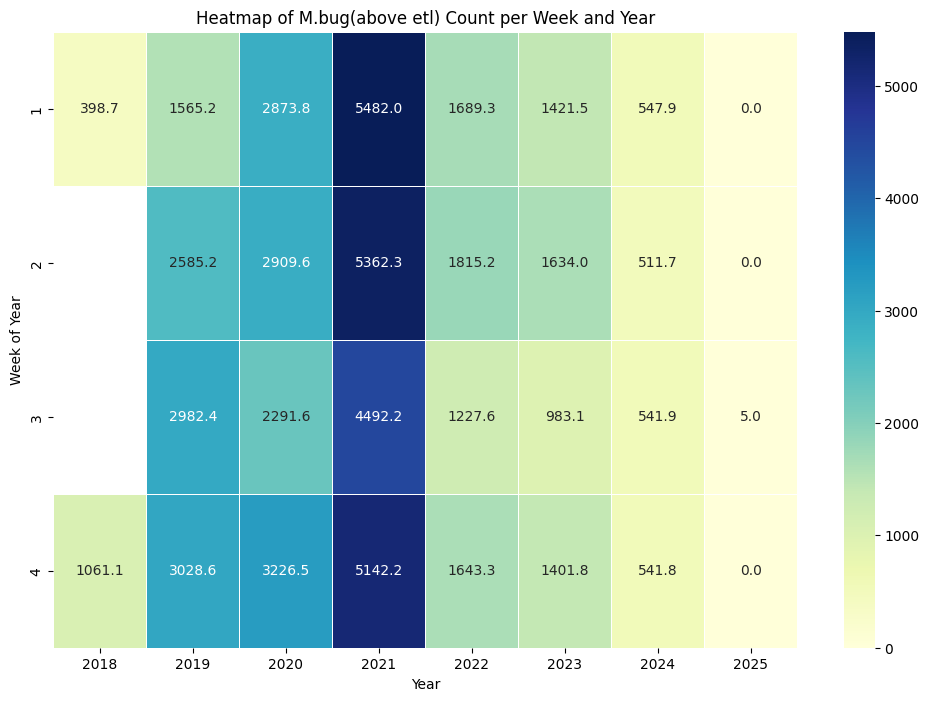

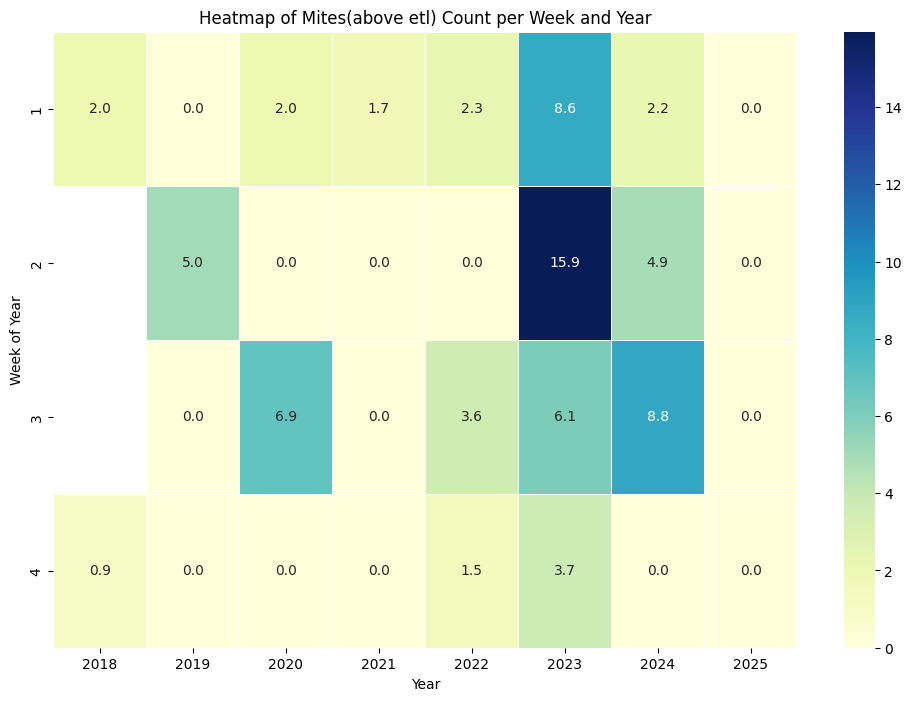

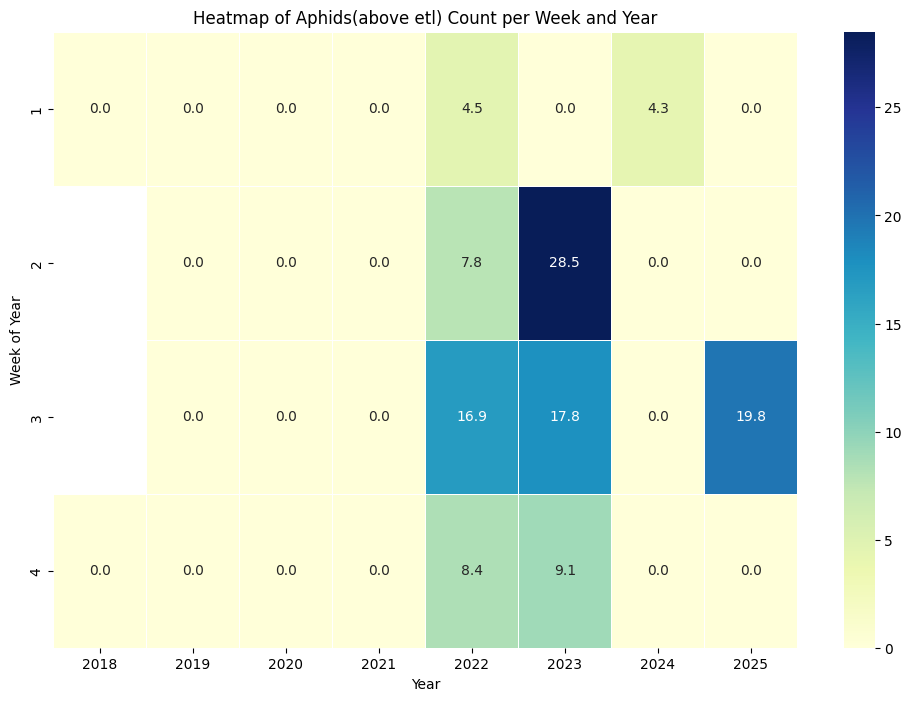

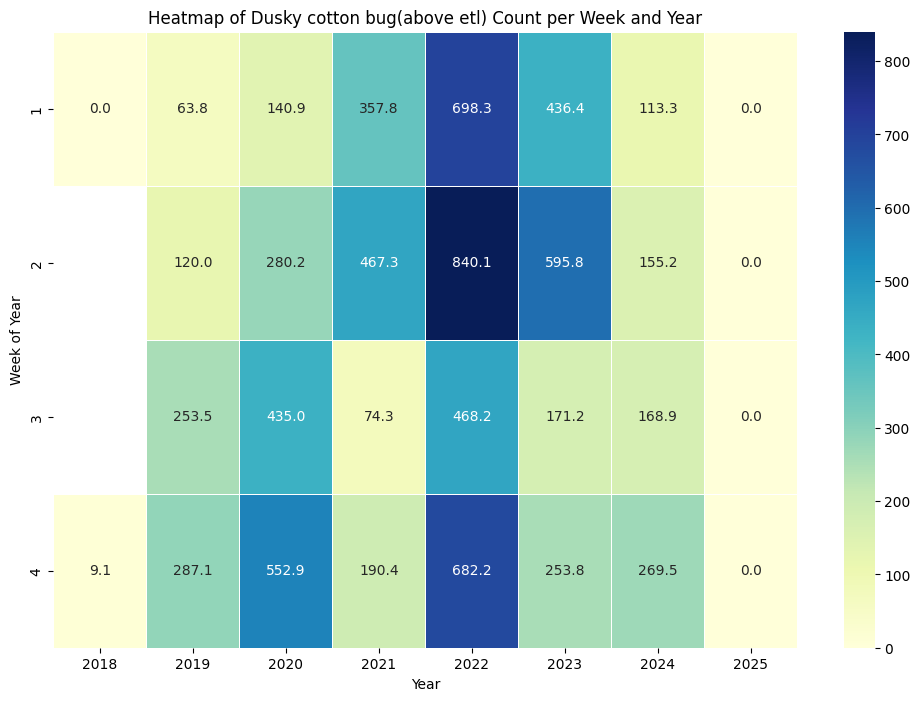

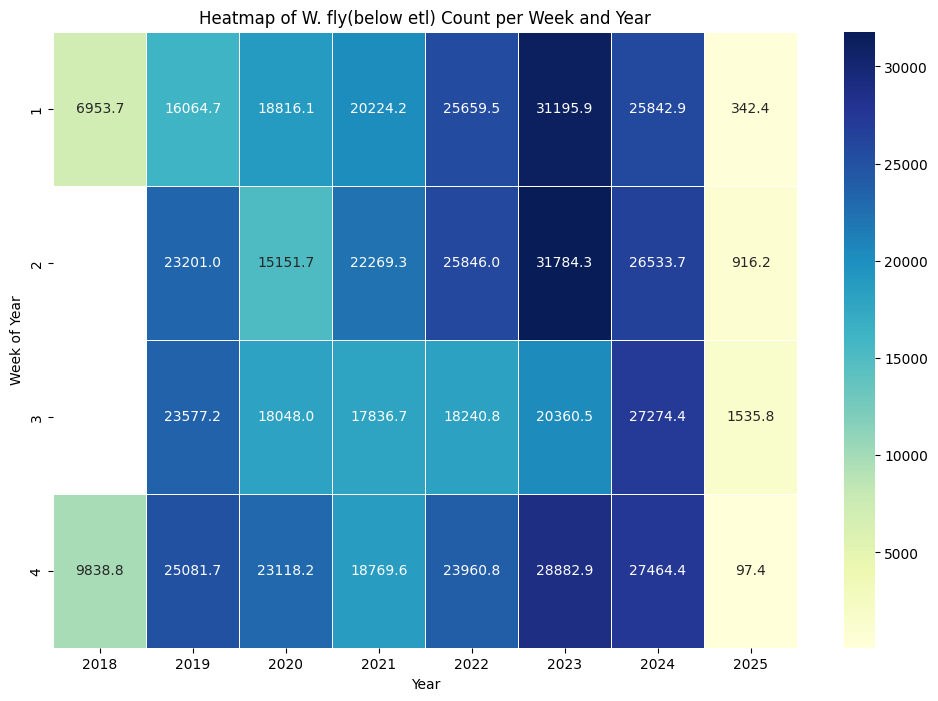

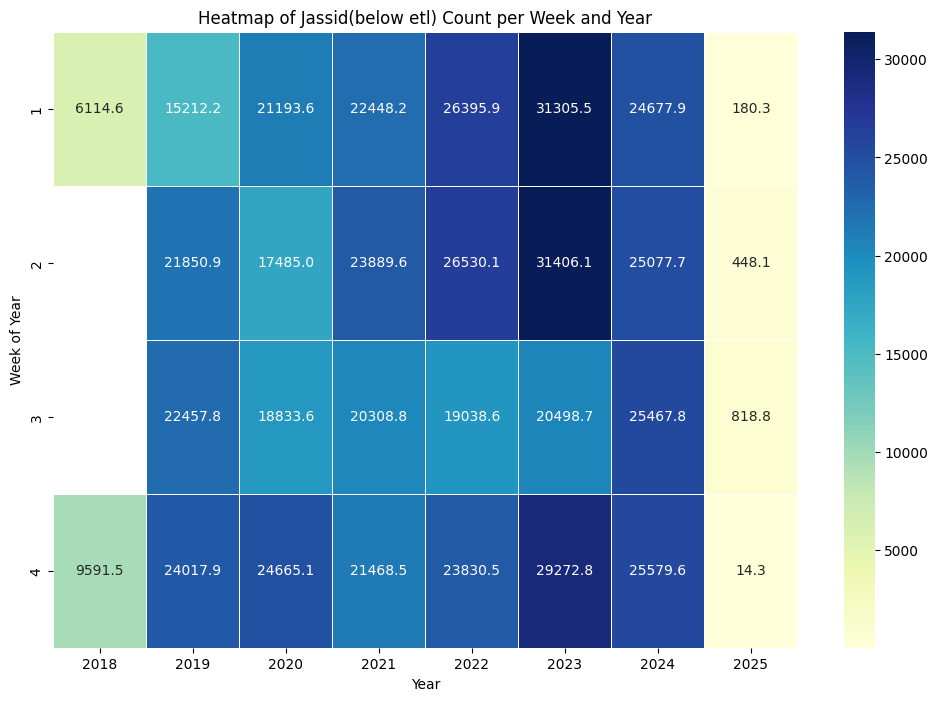

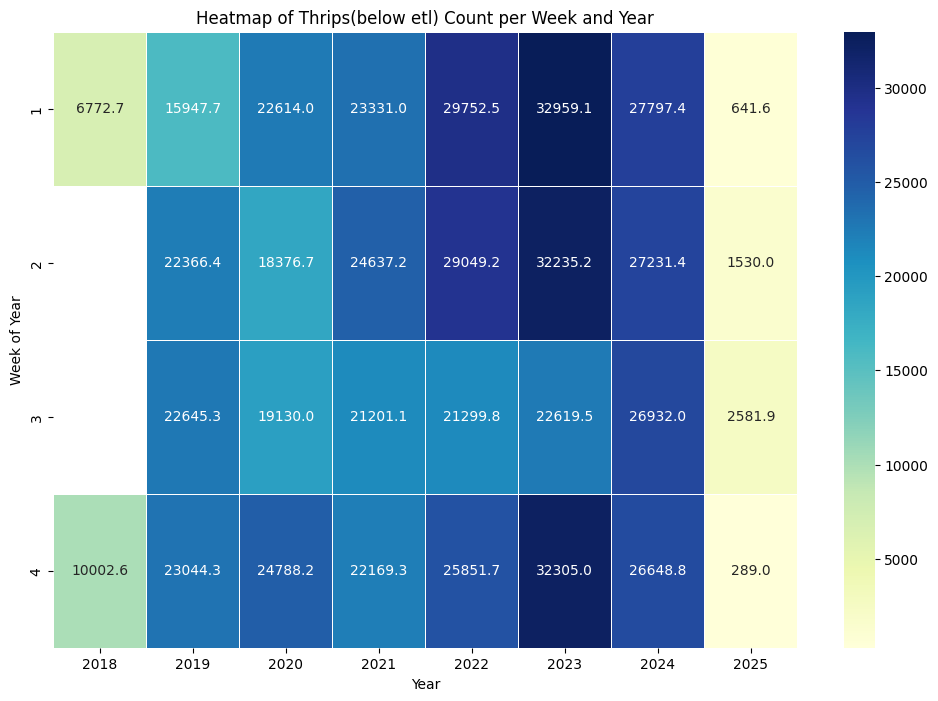

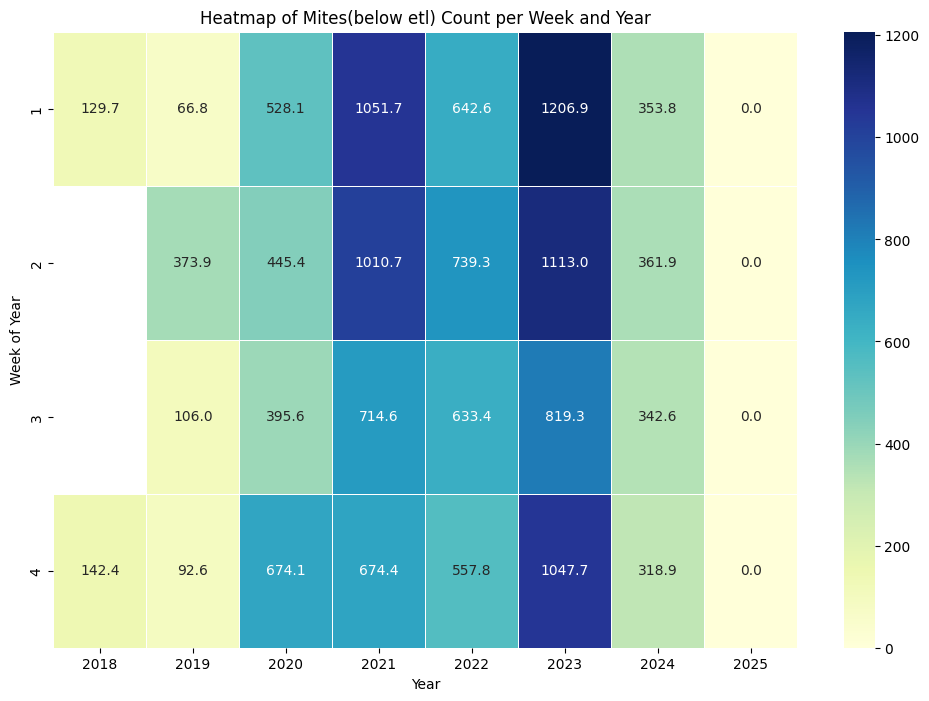

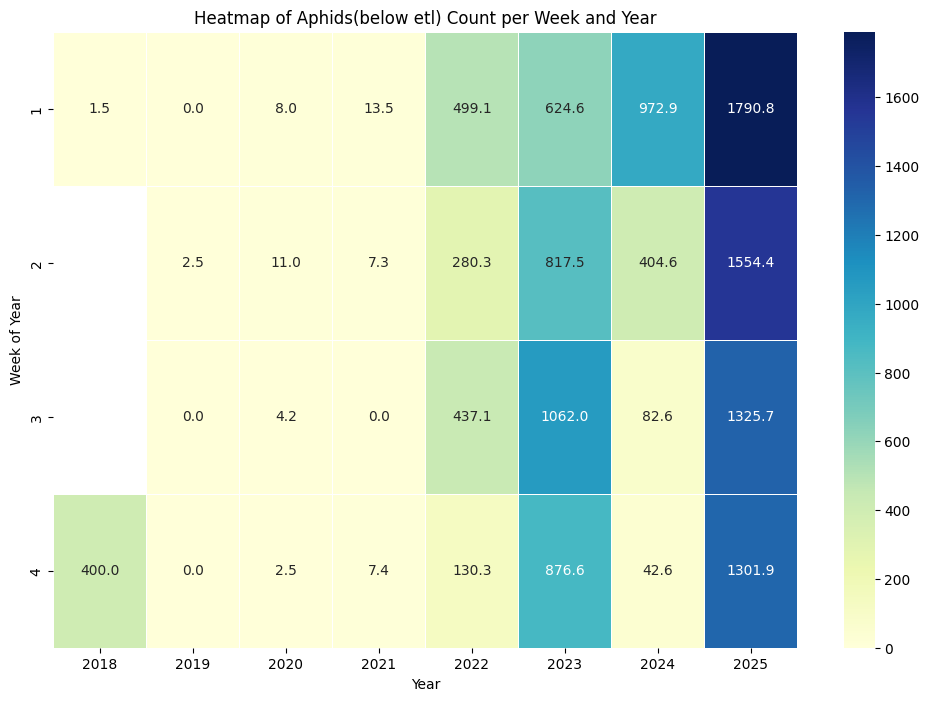

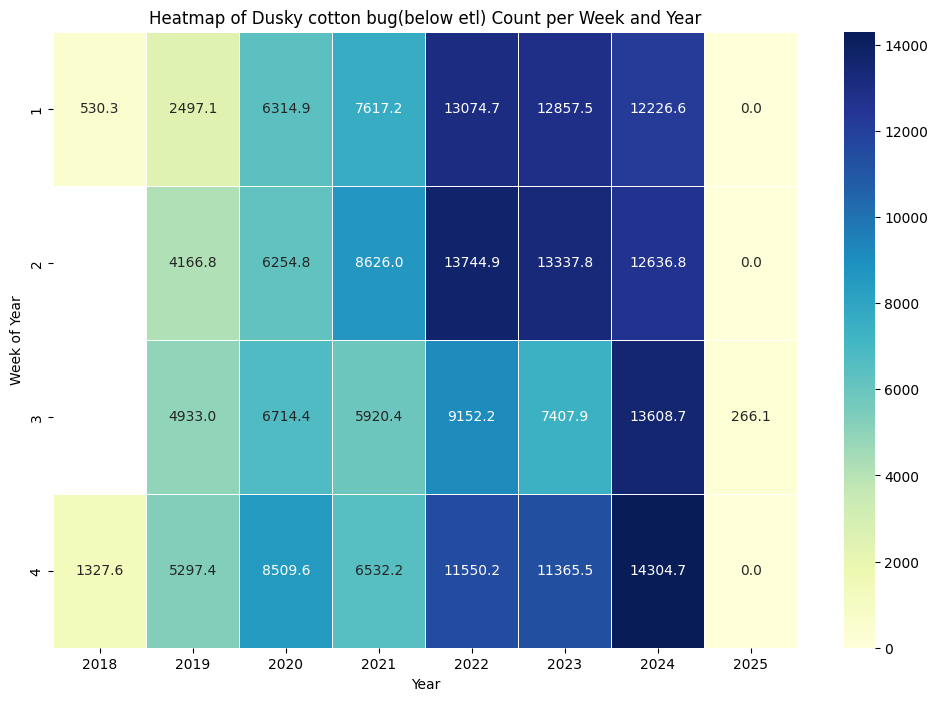

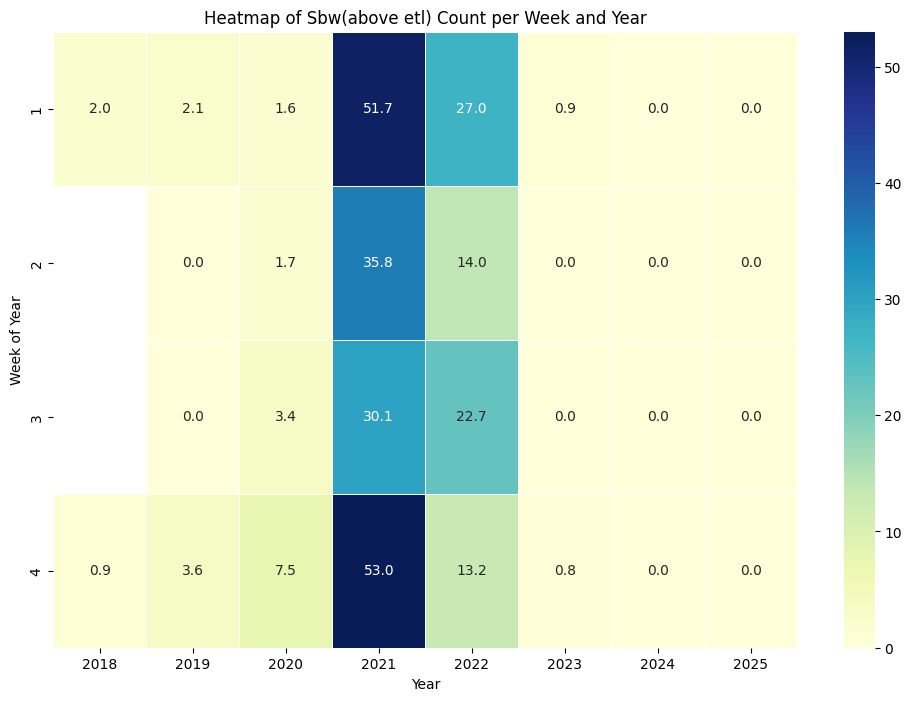

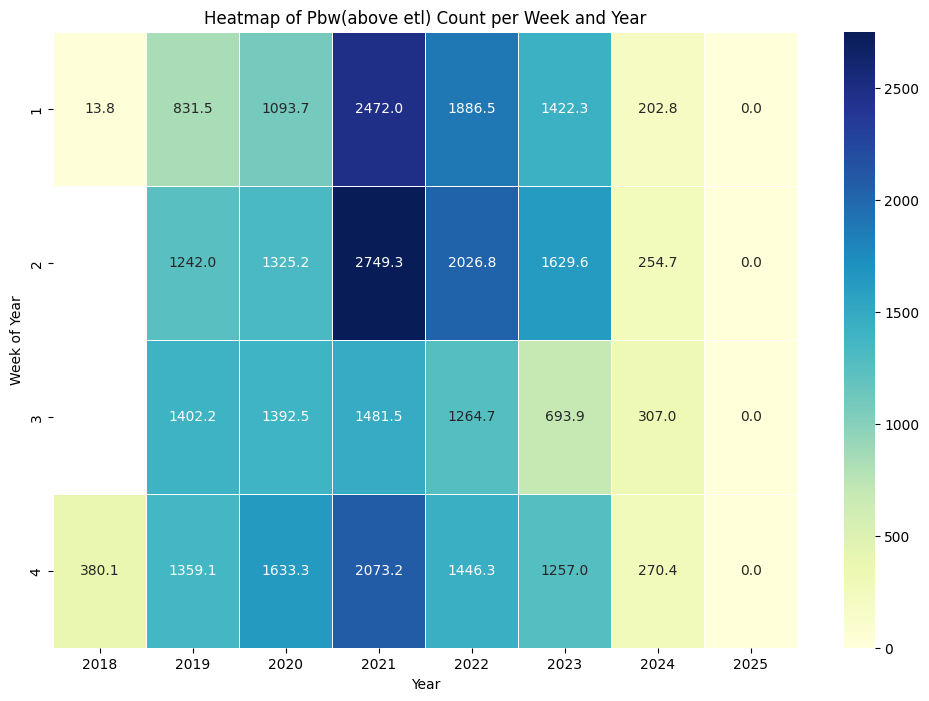

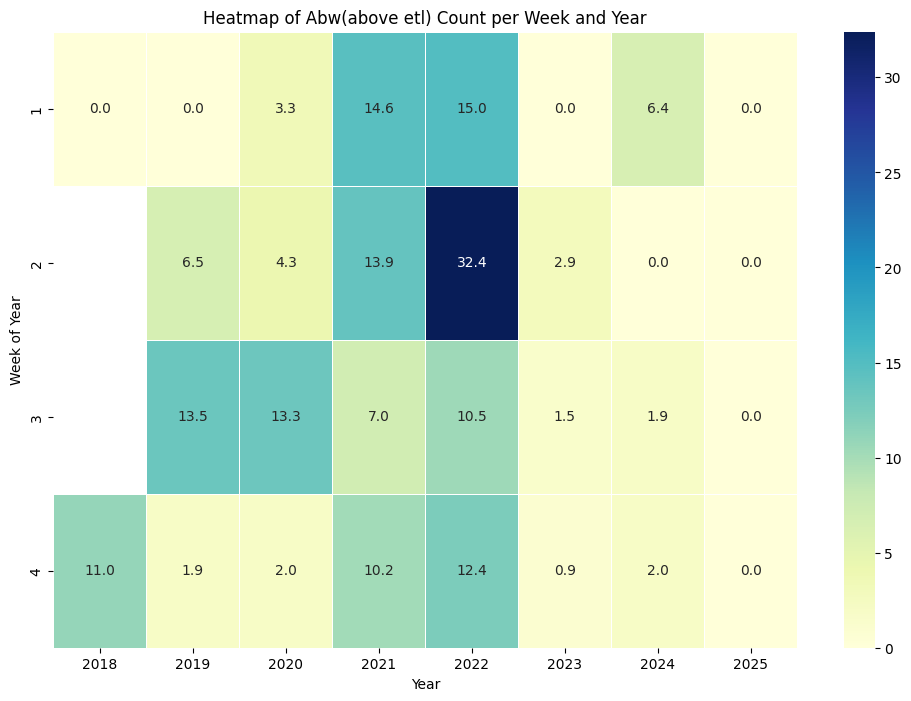

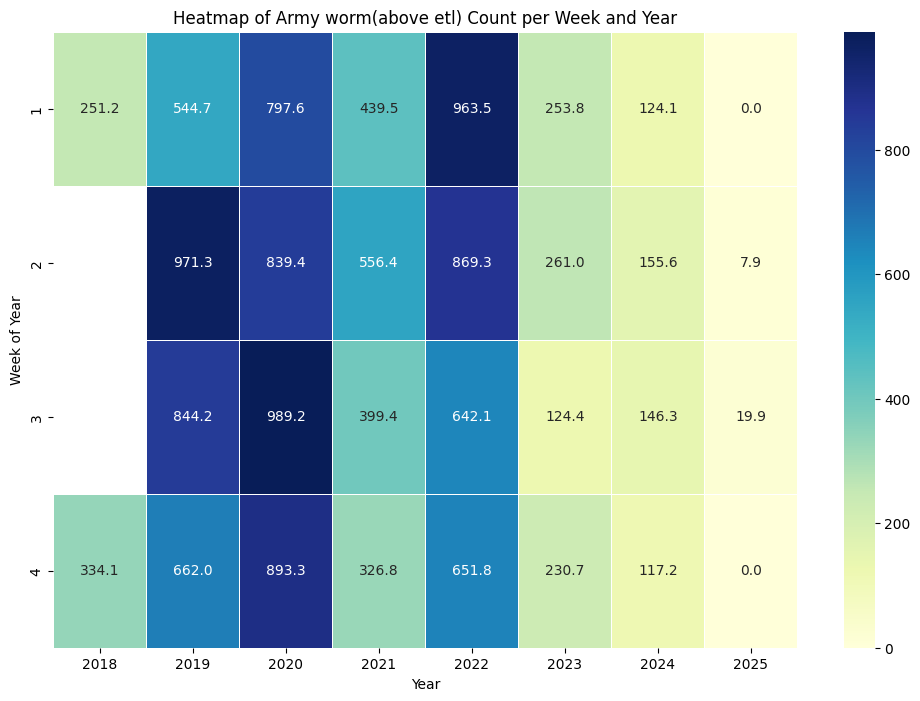

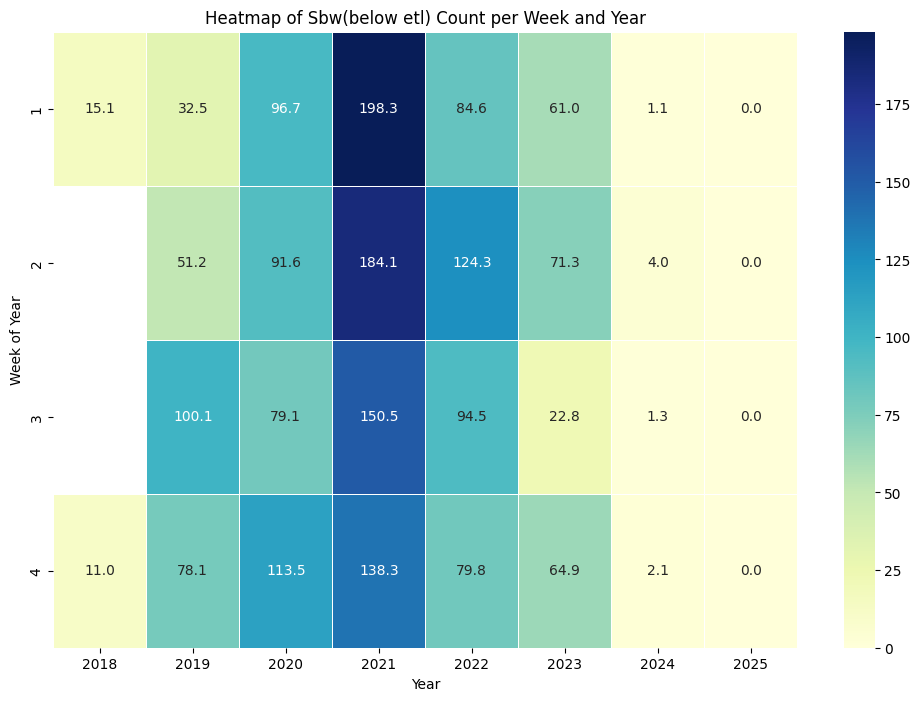

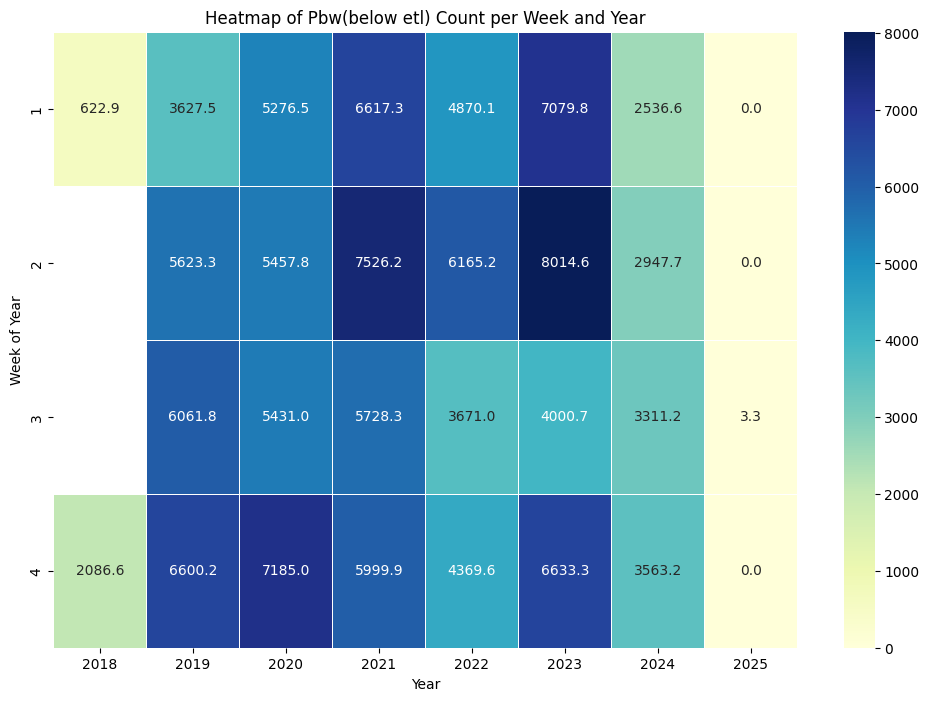

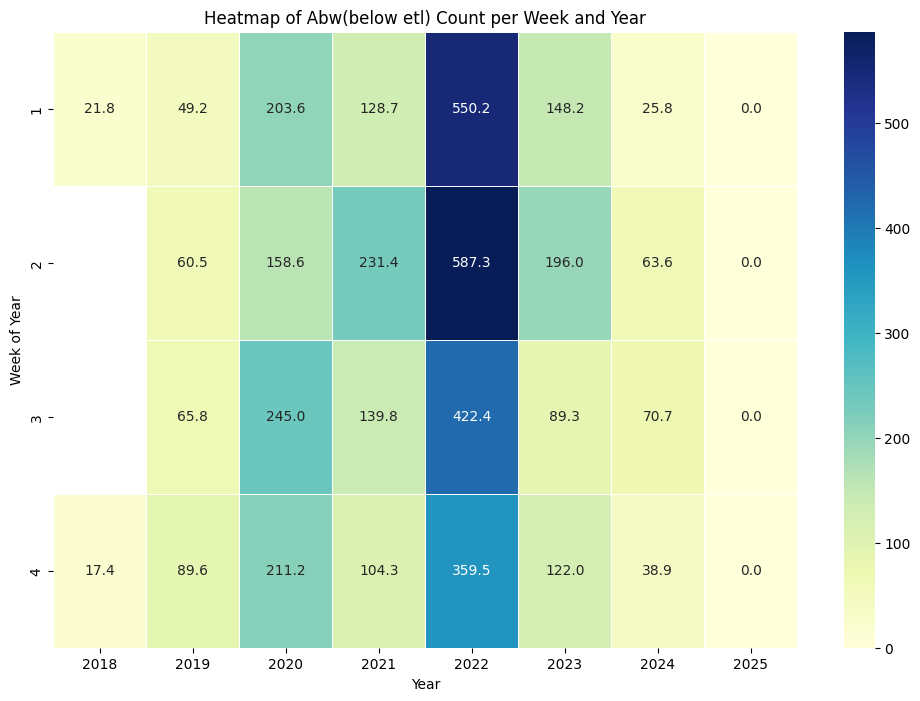

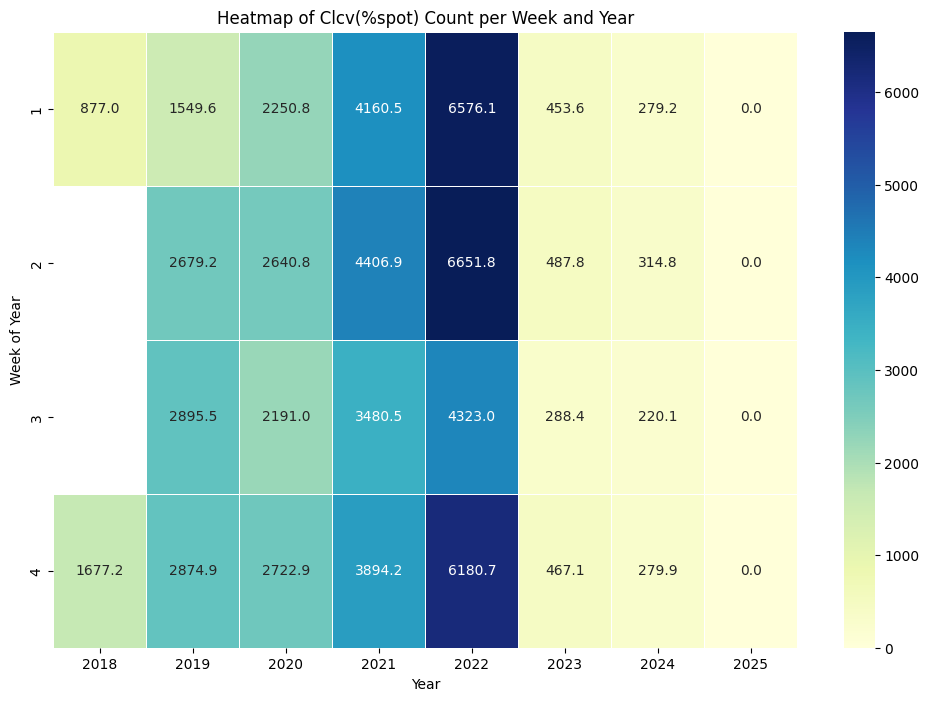

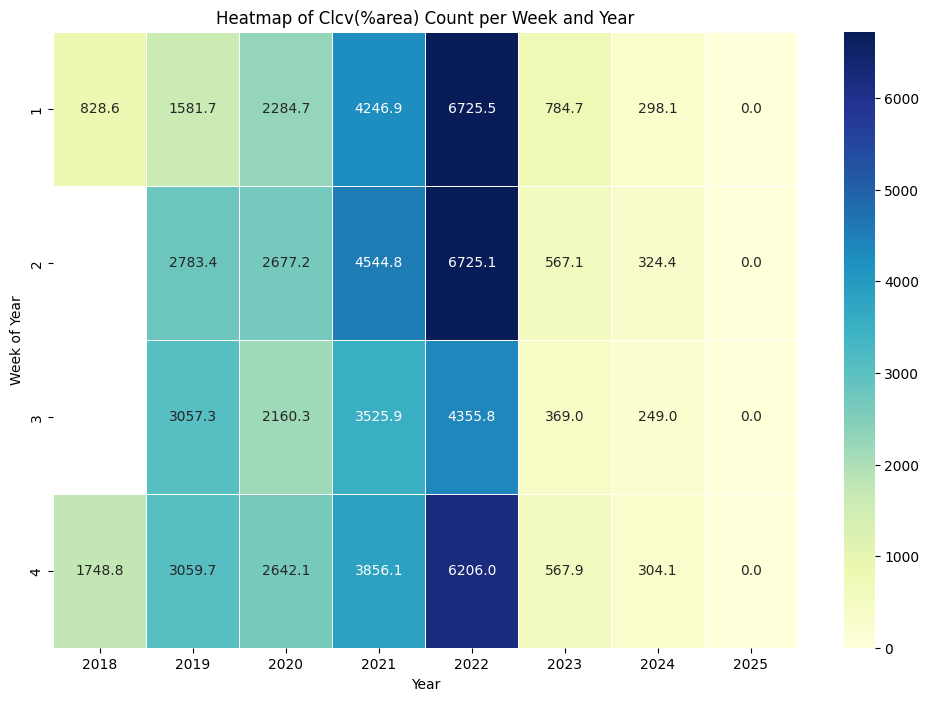

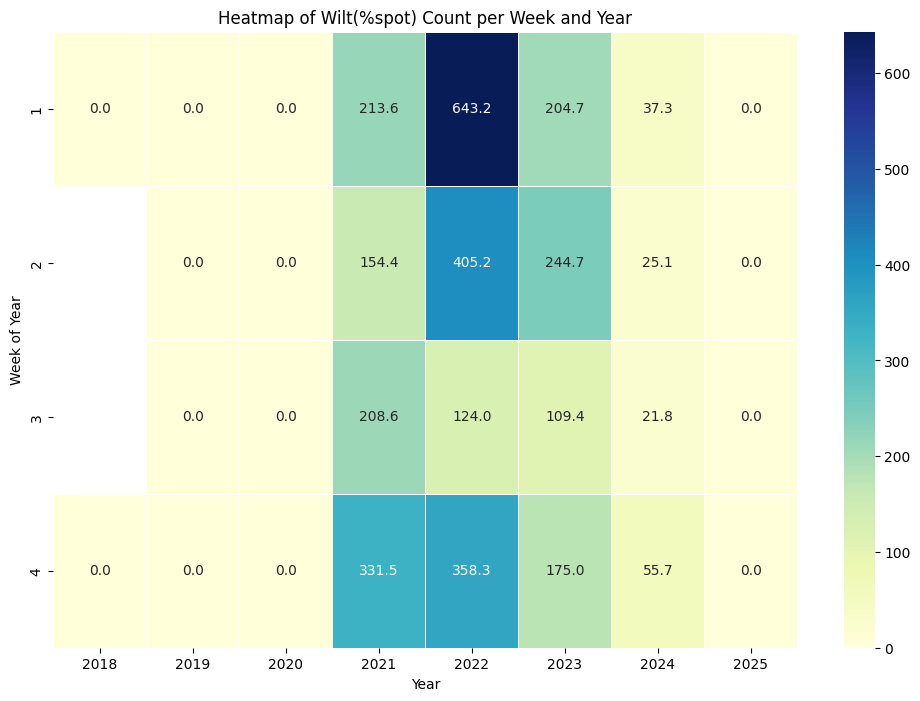

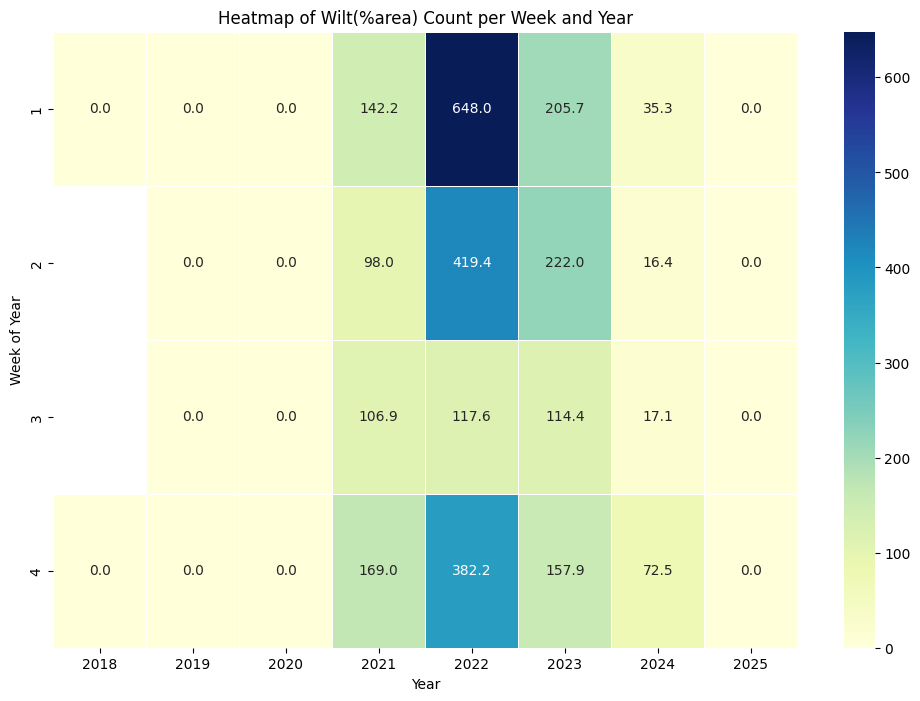

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and pest_columns are defined
pest_columns = ['TOTAL SPOTS VISITED', 'TOTAL AREA VISITED',
       'W. FLY(ABOVE ETL)', 'JASSID(ABOVE ETL)', 'THRIPS(ABOVE ETL)',
       'M.BUG(ABOVE ETL)', 'MITES(ABOVE ETL)', 'APHIDS(ABOVE ETL)',
       'DUSKY COTTON BUG(ABOVE ETL)', 'W. FLY(BELOW ETL)', 'JASSID(BELOW ETL)',
       'THRIPS(BELOW ETL)', 'MITES(BELOW ETL)', 'APHIDS(BELOW ETL)',
       'DUSKY COTTON BUG(BELOW ETL)', 'SBW(ABOVE ETL)', 'PBW(ABOVE ETL)',
       'ABW(ABOVE ETL)', 'Army Worm(ABOVE ETL)', 'SBW(BELOW ETL)',
       'PBW(BELOW ETL)', 'ABW(BELOW ETL)', 'CLCV(%SPOT)', 'CLCV(%AREA)',
       'WILT(%SPOT)', 'WILT(%AREA)']

for pest in pest_columns:
    # Create a pivot table for the current pest
    heatmap_data = df.pivot_table(index='week', columns='year', values=pest, aggfunc='sum')

    # Convert the heatmap data to numeric, coercing errors to NaN
    # This will turn any values that cannot be converted to numbers into NaN
    heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')

    # You might want to fill NaN values, depending on how you want them
    # to appear on the heatmap. Common options are 0 or the mean.
    # heatmap_data = heatmap_data.fillna(0) # Example: fill NaN with 0

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    # Set annot_fmt to None if you have NaN values and don't want them annotated
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
    plt.title(f'Heatmap of {pest.capitalize()} Count per Week and Year')
    plt.xlabel('Year')
    plt.ylabel('Week of Year')
    plt.show()

In [ ]:
!pip install openmeteo-requests requests_cache retry_requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 668.4/668.4 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.9/247.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.4/393.4 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 81.3 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests

import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 31.1704,
	"longitude": 72.7097,
	"start_date": "2018-01-01",
	"end_date": "2025-05-29",
	"daily": ["temperature_2m_mean", "temperature_2m_max", "temperature_2m_min", "dew_point_2m_mean"],
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(2).ValuesAsNumpy()
daily_dew_point_2m_mean = daily.Variables(3).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["dew_point_2m_mean"] = daily_dew_point_2m_mean

daily_dataframe = pd.DataFrame(data = daily_data)
# Convert 'date' column to datetime if it's not already
daily_dataframe['date'] = pd.to_datetime(daily_dataframe['date'])

# Set 'date' as the index
daily_dataframe.set_index('date', inplace=True)

# Resample to weekly frequency and calculate the mean
weekly_dataframe = daily_dataframe.resample('W').mean()

# Reset the index if you want 'date' to be a column again
weekly_dataframe.reset_index(inplace=True)

# Display the resulting weekly dataframe
# Ensure 'date' is a datetime object
weekly_dataframe['date'] = pd.to_datetime(weekly_dataframe['date'])

# Extract week, month, and year from the date
weekly_dataframe['week'] = weekly_dataframe['date'].dt.isocalendar().week
weekly_dataframe['month'] = weekly_dataframe['date'].dt.month
weekly_dataframe['year'] = weekly_dataframe['date'].dt.year
day = weekly_dataframe['date'].dt.day

# Step 2: Week of month = (day - 1) // 7 + 1
weekly_dataframe['week'] = ((day - 1) // 7) + 1

# Display the resulting dataframe
weekly_dataframe = weekly_dataframe.drop(columns=['date'])

weekly_dataframe

# Ensure columns exist and are of integer type
df[['year', 'month', 'week']] = df[['year', 'month', 'week']].astype(int)
weekly_dataframe[['year', 'month', 'week']] = weekly_dataframe[['year', 'month', 'week']].astype(int)

# Merge df with weather data from weekly_dataframe
df = df.merge(
    weekly_dataframe[['year', 'month', 'week', 'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'dew_point_2m_mean']],
    on=['year', 'month', 'week'],
    how='left'
)
df

Coordinates 31.17750358581543°N 72.66349792480469°E
Elevation 170.0 m asl
Timezone b'Asia/Karachi'b'GMT+5'
Timezone difference to GMT+0 18000 s


,week,month,year,TOTAL SPOTS VISITED,TOTAL AREA VISITED,W. FLY(ABOVE ETL),JASSID(ABOVE ETL),THRIPS(ABOVE ETL),M.BUG(ABOVE ETL),MITES(ABOVE ETL),...,CLCV(%SPOT),CLCV(%AREA),WILT(%SPOT),WILT(%AREA),latitude,longitude,temperature_2m_mean,temperature_2m_max,temperature_2m_min,dew_point_2m_mean
0,1,5,2022,15,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.1575,71.5249,35.307678,44.238926,26.596071,2.266310
1,1,5,2022,15,62.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.8801,71.2939,35.307678,44.238926,26.596071,2.266310
2,1,5,2022,9,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.6346,71.2184,35.307678,44.238926,26.596071,2.266310
3,1,5,2022,14,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.3018,71.9321,35.307678,44.238926,26.596071,2.266310
4,1,5,2022,15,74.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.2752,71.8044,35.307678,44.238926,26.596071,2.266310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,1,7,2020,15,48.0,0.0,6.7,6.7,0.0,0.0,...,0.0,0.0,0.0,0.0,32.6833,71.2667,33.862442,39.160358,28.446072,23.925535
9716,1,7,2020,6,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.6333,71.0667,33.862442,39.160358,28.446072,23.925535
9717,1,7,2020,7,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.3833,71.4500,33.862442,39.160358,28.446072,23.925535
9718,1,7,2020,13,34.0,0.0,15.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.6167,71.2667,33.862442,39.160358,28.446072,23.925535


In [ ]:
# Define the base temperature for degree day calculation
T_base = 10  # degrees Celsius, common base for many crops

df['weekly_degree_days'] = ((df['temperature_2m_max'] + df['temperature_2m_min']) / 2 - T_base).clip(lower=0) * 7

# Show the result
df

,week,month,year,TOTAL SPOTS VISITED,TOTAL AREA VISITED,W. FLY(ABOVE ETL),JASSID(ABOVE ETL),THRIPS(ABOVE ETL),M.BUG(ABOVE ETL),MITES(ABOVE ETL),...,CLCV(%AREA),WILT(%SPOT),WILT(%AREA),latitude,longitude,temperature_2m_mean,temperature_2m_max,temperature_2m_min,dew_point_2m_mean,weekly_degree_days
0,1,5,2022,15,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.1575,71.5249,35.307678,44.238926,26.596071,2.266310,177.922501
1,1,5,2022,15,62.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,29.8801,71.2939,35.307678,44.238926,26.596071,2.266310,177.922501
2,1,5,2022,9,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,29.6346,71.2184,35.307678,44.238926,26.596071,2.266310,177.922501
3,1,5,2022,14,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.3018,71.9321,35.307678,44.238926,26.596071,2.266310,177.922501
4,1,5,2022,15,74.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.2752,71.8044,35.307678,44.238926,26.596071,2.266310,177.922501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,1,7,2020,15,48.0,0.0,6.7,6.7,0.0,0.0,...,0.0,0.0,0.0,32.6833,71.2667,33.862442,39.160358,28.446072,23.925535,166.622498
9716,1,7,2020,6,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,31.6333,71.0667,33.862442,39.160358,28.446072,23.925535,166.622498
9717,1,7,2020,7,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,31.3833,71.4500,33.862442,39.160358,28.446072,23.925535,166.622498
9718,1,7,2020,13,34.0,0.0,15.4,0.0,0.0,0.0,...,0.0,0.0,0.0,31.6167,71.2667,33.862442,39.160358,28.446072,23.925535,166.622498


In [ ]:
df =  pd.read_excel('final_data.xlsx')
df

,week,month,year,TOTAL SPOTS VISITED,TOTAL AREA VISITED,W. FLY(ABOVE ETL),JASSID(ABOVE ETL),THRIPS(ABOVE ETL),M.BUG(ABOVE ETL),MITES(ABOVE ETL),...,CLCV(%AREA),WILT(%SPOT),WILT(%AREA),latitude,longitude,temperature_2m_mean,temperature_2m_max,temperature_2m_min,dew_point_2m_mean,weekly_degree_days
0,1,5,2022,15,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.1575,71.5249,35.307678,44.238926,26.596071,2.266310,177.922501
1,1,5,2022,15,62.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,29.8801,71.2939,35.307678,44.238926,26.596071,2.266310,177.922501
2,1,5,2022,9,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,29.6346,71.2184,35.307678,44.238926,26.596071,2.266310,177.922501
3,1,5,2022,14,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.3018,71.9321,35.307678,44.238926,26.596071,2.266310,177.922501
4,1,5,2022,15,74.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.2752,71.8044,35.307678,44.238926,26.596071,2.266310,177.922501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,1,7,2020,15,48.0,0.0,6.7,6.7,0.0,0.0,...,0.0,0.0,0.0,32.6833,71.2667,33.862442,39.160358,28.446072,23.925535,166.622498
9716,1,7,2020,6,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,31.6333,71.0667,33.862442,39.160358,28.446072,23.925535,166.622498
9717,1,7,2020,7,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,31.3833,71.4500,33.862442,39.160358,28.446072,23.925535,166.622498
9718,1,7,2020,13,34.0,0.0,15.4,0.0,0.0,0.0,...,0.0,0.0,0.0,31.6167,71.2667,33.862442,39.160358,28.446072,23.925535,166.622498


In [ ]:
# df.to_excel('final_data.xlsx', index=False)
df.columns

Index(['week', 'month', 'year', 'TOTAL SPOTS VISITED', 'TOTAL AREA VISITED',
       'W. FLY(ABOVE ETL)', 'JASSID(ABOVE ETL)', 'THRIPS(ABOVE ETL)',
       'M.BUG(ABOVE ETL)', 'MITES(ABOVE ETL)', 'APHIDS(ABOVE ETL)',
       'DUSKY COTTON BUG(ABOVE ETL)', 'W. FLY(BELOW ETL)', 'JASSID(BELOW ETL)',
       'THRIPS(BELOW ETL)', 'MITES(BELOW ETL)', 'APHIDS(BELOW ETL)',
       'DUSKY COTTON BUG(BELOW ETL)', 'SBW(ABOVE ETL)', 'PBW(ABOVE ETL)',
       'ABW(ABOVE ETL)', 'Army Worm(ABOVE ETL)', 'SBW(BELOW ETL)',
       'PBW(BELOW ETL)', 'ABW(BELOW ETL)', 'CLCV(%SPOT)', 'CLCV(%AREA)',
       'WILT(%SPOT)', 'WILT(%AREA)', 'latitude', 'longitude',
       'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
       'dew_point_2m_mean', 'weekly_degree_days'],
      dtype='object')

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from io import StringIO
from IPython.display import display


numeric_cols = df.columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Filter: May 2022, whitefly above ETL
df_filtered = df[
    # (df['month'] == 5) &
    (df['year'] == 2024) &
    (df['W. FLY(ABOVE ETL)'] > 0)
]

# Prepare heatmap data
heat_data = df_filtered[['latitude', 'longitude', 'PBW(ABOVE ETL)']].values.tolist()

# Create the map
map_center = [
    df_filtered['latitude'].mean(),
    df_filtered['longitude'].mean()
]
m = folium.Map(location=map_center, zoom_start=7)

# Add heatmap
HeatMap(heat_data, name='Whitefly Infestation (May 2022)', min_opacity=0.2, blur=15, max_zoom=12).add_to(m)

display(m)
